<p><h1><b>Chapter 8: Descending Gradient</b></h1></p>
<p><i>"Those who boast of their descendants have an advantage of what they owe to others" </i></p>
<p> -Seneca</p>
<p><b> Estimating the Gradient</b></p>
<p> If $f$ is a variable function, its derivative in a point $x$ indicates that $f(x)$ changes when we make a slight change in $x$. Its defines as the limit of diferencial quotient:</p>

In [ ]:
def difference_quotient(f,x,h):
    return (f(x+h) - f(x))/h

as $h$ approaches zero. 
<p> To many functions is easy to calculate the derivative with precision. For example, the square function:</p>

In [ ]:
def square(x):
    return x**2

has the derivative:

In [ ]:
def derivative(x):
    return 2*x

We can check this with the graphic:

In [ ]:
import matplotlib.pyplot as plt
from functools import partial
#you can acknowledge this function by the following use

In [ ]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)

In [ ]:
x = range(-10,10)
y_der = list(map(derivative,x))
y_est = list(map(derivative_estimate,x))

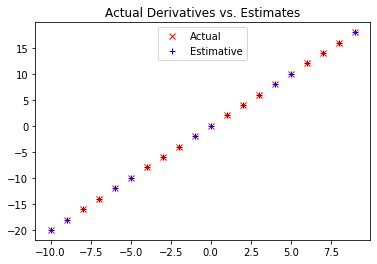

In [ ]:
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, y_der, 'rx',label="Actual")
plt.plot(x, y_est, 'b+', label='Estimative')
plt.legend(loc=9)
plt.show()

<p> We can calculate the parcial derivative of the i-th as this: </p>

In [ ]:
def partial_difference_quotient(f,v,i,h):
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumarate(v)]
    return (f(w) - f(v))/h

And then, estimate the gradient in the same way:

In [ ]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
           for i, _ in enumerate(v)]

 <p><b> Using the Gradient</b></p>
 <p> Its easy to see that <tt>sum_of_squares_gradient</tt> has its minimum when $v$ is a vector of zeros. But, imagine that if we didn't know. We are going to use gradient to find the minal between every tridimensional vectors. We will pick a random initial point and move small steps in the opposite direction of the gradient, until we find a point where the gradient is small enough.</p>
 <p> We are going to use derivative to calculate the size of the step. The bigger the derivative, the bigger the step.</p>
 <p> $x_{n+1}^k = x_n^k + \alpha\cdot 2\cdot x_n^k$</p>
 <p> where:</p>
 <p> $x_n =  \begin{bmatrix}
x_n^1\\
x_n^2\\
...\\
x_n^k
\end{bmatrix}$ is our vector and $\alpha \equiv -0.01$ is our coeficient. </p>

In [ ]:
import random, math

In [ ]:
def step(v, direction, step_size):
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2*v_i for v_i in v]

def distance(v, next_v):
    dist = 0
    for v_i, next_v_i in zip(v, next_v):
        dist += (v_i - next_v_i)**2
    return math.sqrt(dist)

In [ ]:
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001

In [ ]:
while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v,gradient,-0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
print(v)

[-2.2215127272775794e-06, 3.5544203636441233e-06, 2.6658152727330933e-06]


<p><b> Choosing the Size of the Next Step</b></p>
<p> Although the logic begind the direction of gradient is clear, the step isn't. Choosing the size of the next step is more an art than science. The most popular options are:</p>
<ul>
    <li> Fixed size step</li>
    <li> Decrease gradually the size of the step each time</li>
    <li> For each step, choose a different size of the step to minimize the value of the function</li>
</ul>
<p> The last one seems to be the best, but has a high computational cost. We can approximate the step size by picking different pre-determineted step sizes. </p>

In [ ]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

<p> Its possible that some step sizes will result in invalid inputs for our function. So, you will nedd a "safe application" function that will return infinite to invalid inputs.</p>

In [ ]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

<p> <b>Putting Everything Together</b></p>
<p> Given a function -<tt>target_fn</tt>, and its gradient - <tt>gradient_fn</tt>, that we want to minimize, sometimes the function could represent errors in a module with a function of its parameters, and maybe we want to find the parameters that produces the smallest possible errors.</p>
<p> Generally, we would choose the parameters that we are going to call $\theta$ (<tt>theta</tt>). When we are working with linear functions, the <tt> theta </tt> parameters of a hypotesis function would look like that:</p>
<p> $h_{\theta}(x) = \theta_0 + \theta_1 x$ </p>
<p> We are going to call a <tt> minimize_batch</tt> that will, for each step of the bradient, consider whole sets of data. </p>

In [ ]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.0000001):
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_theta = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

Sometimes we want to maxime a function and we can do it by minimizing its negative.

In [ ]:
def negate(f):
    #returns a function that, for every input, x returns -f(x)
    return lambda *args, **kwargs: -f(*args, **kwargs)
    
def negate_all(f):
    #returns a inversed signal list of numbers
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

In [ ]:
def maximize_batch(target_fn, gradient_fn, thetha_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                         negate_all(gradient_fn),
                         theta_0,
                         tolerance)

<p><b> Estocastic Descendent Gradient</b></p>
<p> We are frequently going to use the descendent gradient to pick teh parameters of a model in the way to minimize the error. Generally, as seen before, the error of the whole set of data is the sum of each individual error.</p>
<p> For example, the cost for the whole set of data to a bidimensional linear regression is:  </p>
<p> $Cost = \Sigma_{i=1}^n (\theta_1 x_i + \theta_0 - y_i)^2$</p>
<p> and that is what we want to minimize.</p>
<p> When this is the case, we can apply a technique called "Estocastic Descendent Gradient". that computates the gradient (and takes a step) one point at a time. It circulates over our data repeatedly until find a stop point.</p>
<p> For every cicle, we want to iterate over our data in a random order. </p>

In [ ]:
import numpy as np

In [ ]:
def in_random_order(data):
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(intexes)
    for i in indexes:
        yield data[i]

We are going to give a gradient step for each point of the data. This allows us to circulates nearby a minimun forever and, eventually, stop.

In [ ]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0 = 0.01):
    
    data = zip(x,y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0
    
    while interactions_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i,y_i, theta)
            theta = np.subtract(theta, np.array(gradient_i)*alpha)
            
    return min_theta

The stocastic version is tipically faster than the batch version. Naturally, we would want a version that maximizes the same way:

In [ ]:
def maximize_stocastic(target_fn, gradient_fn, x, y, theta_0, alpha_0 = 0.01):
    return minimize_stocastic(negate(target_fn),
                             negate_all(gradient_fn),
                             x,y,theta_0, alpha_0)